**Dima Tsvetkov**

**Kaggle nickname: Dakine100500 (Dima Tsvetkov)**

**NetID: dt169**

**In-Class Kaggle Competition**

# **Exploratory Analysis**
First, I looked at all the features on kaggle.com. It has a very useful and convenient data representation
as diagrams and overall statistics on each feature.

I found out that there are 3 useless features that have the
exact same value for all of the dots: ['Over18', 'EmployeeCount', 'StandardHours']. So I deleted them.

Also, some of the features are categorical (not something I can efficiently transform into numbers and order them)
: ['BusinessTravel', 'Department', 'EducationField', 'Gender',
'JobRole', 'MaritalStatus', 'OverTime']. I relocated them to end of the data array (last columns) in order to easier
later analysis.

A lot of feature have text values so I changed them all into numbers that make sense. For example:
'Non-Travel': 0, 'Travel_Rarely': 0.5, 'Travel_Frequently': 1.

After that I rescaled all the features into [0, 1] range (for the validation data I used the coefficients
obtained from the training data to make sure I am not "leaking" any information to the test array.) I thought
it would make the distances on the same scale with each other. I also tried to normalize all the features on each
other norms (so their squared sum gives 1) but it ended up working worse.

Visually I did not notice anything important from just looking at the data representation on kaggle. So I decided
to look at the correlation between all the features left and check if there are more not important ones not carrying
any additional information. However, it seemed like all the features have at least some new information (no parameters
with very high correlation).

One of the most important things I noticed just by looking at the data is that it is very imbalanced. Thus, at some
point during my work, I was trying to use oversampling to make the data balance. The initial idea was just to copy
some less common examples but then I found some algorithms which can make it more efficient. In the end, I
tried the imblearn.over_sampling package to make the data more balance. I used SMOTE and ADASYN algorithms from it.
ADASYN worked better for the algorithms I used. I haven't tried the undersampling because I decided that our data
is not big enough for that.

Moreover, to find which features are 'good' I plotted all the ROC curves for all the individual features
using logistic regressions. To achieve this goal, I was also trying to use a new tool for myself -
SelectKBest from sklearn.feature_selection with 3 different score functions.
Later I was trying to throw away a different number of the least well-performing features based on all of these
approaches and their combination.

For the same purpose, I also tried SelectFromModel from the same package on some of my best models. This package
shows what are the most important features of this particular model. So It helped me to retrain my models throwing
away some of the least important features.

# **Models**

The first algorithm I chose was the logistic regression from sklearn.linear_model.LogisticRegression. Since this
class is my first experience in machine learning usage I decided to select the algorithm I have the most experience
with through all our lectures and homework. Moreover, this algorithm is very well-known and has a lot of
well-developed instruments in the same library (sklearn). On top of that, it is one of the fastest algorithms
and it has a wide variety of parameters I can work with. Logistic regression is much easier to use than a lot of
other algorithms. All of that together allowed me not only to study some of the new methods I have never used before
(such as SelectFromModel and GridSearchCV) but also I could try a lot of different approaches way easier and faster
(for example it was a good way to learn how oversampling works, which parameters should I choose). Moreover,
because of how fast it is I practiced and developed some functions and algorithms for the next models I used.
Also, since I used logistic regression to study the "quality" of the features it was easier to operate with these
good features via logistic regression algorithm.

The second algorithm I used was a random forest classifier. Besides the similar to the logistic regression benefits, such as
well-studied, good implementation in sklearn, ease of use, and simplicity and parametrization, (also, I could
a lot of scripts I used for logistic regression) there was one more
thing I was guided by. In the logistic regression, I could not but the problem of overfitting that easily and I thought
that random forest classifier should be better in terms of overfitting (In the end it did not help that much but that
is what I thought because it was easy to understand what some parameters such as tree max depth were actually doing).


The last algorithm I used was a Adaboost. Besides all the advantages I mentioned earlier (but both
the Adaboost and random forest are not even close to the logistic regression in terms of speed) this method
was a good idea to use because I have practiced a lot with decision tree classifiers previously in the
random forest algorithm parametrization, so I had some idea of how deep my trees should be,
how many nodes and leaves it should have and so on. I decided
that I can quickly try this algorithm and see if it works well (it was also 3 times faster
than the random forest classifier). In the end, this method was the one
that performed the best.

# **Training**

For the logistic regression problem I was mainly working with l2 regularization term and using mostly LIBLINEAR solver,
and thus, it minimizes for $\mathbf{\beta}$ the following cost function:
$\dfrac{1}{n}\sum_{i=1}^n\log(1+exp(-y_i\mathbf{\beta}^T\mathbf{x_i}) + \lambda ||\mathbf{\beta}||_2^2$ where
$\lambda$ is the penalty parameter (it's $C$ in sklearn.linear_model.LogisticRegression).
In some cases, the discriminant function of the classifier includes a bias term. LIBLINEAR handles this term by
augmenting the vector w and each instance xi with an additional dimension:
$\mathbf{\beta}^T\leftarrow \mathbf{\beta}^T, b, \mathbf{x}_i^T \leftarrow \mathbf{x}_i^T, B$
where $B$ is a constant specified by the user. LIBLINEAR uses Automatic parameter selection and it applies
the coordinate descent algorithm.
For multi-class classification the problem is decomposed in 2 possible way: 1) one-vs-the rest, 2) Crammer & Singer.
LIBLINEAR actually can also support the SVM algorithm.
(Source (LIBLINEAR site): https://www.csie.ntu.edu.tw/~cjlin/liblinear/)

The core principle of adaboost is to fit a group of weak learners (at least slightly above the random guessing) on the
data, which being constantly modified with each iteration. After several iterations we combine all the weak learners
with obtained weights.
Adaboost from sklearn.ensemble implements the algorithm known as AdaBoost-SAMME. This training algorithm can be
represented in following steps: 1) initialization of the observation weights $w_i=1/n$; 2) for $m=1$ to $m=M$ do:
a) fitting each classifier $T^m$ with the weight $w_m$;
b) compute error $\sum_{i=1}^nw_iI(y_i\ne T^m(x_i))/\sum_{i=1}^nw_i$;
c) compute coefficients $\alpha^m=\log\dfrac{1-err^m}{err^m}$;
d) set $w_i\leftarrow w_i \exp(\alpha^m I(y_i\ne T^m(x_i)))$;
e) Re-normalization of $w_i$.
So the final output is the combination of $\alpha^m T^m$.
(Source: Zhu, H. Zou, S. Rosset, T. Hastie, “Multi-class AdaBoost”, 2009.)

For the random forest classifier is a black box algorithm which averaging a bunch of decision trees on various
sub samples of features. Moreover, the 2nd level of randomness is achieved by training each tree from a sample
of the training set selected with replacement. These high level of randomness should help with the decreasing
of the overall variance of the final classifier.  The scikit-learn implementation combines classifiers by
averaging their probabilistic prediction.
(Source: https://scikit-learn.org/ documentation and guides)

Logistic regression was by far the fastest method to use. Average time required for 1 training with the
whole training data was ~9ms, while for the random forest this time was more than 100 times longer and was ~1s.
AdaBoost was slightly faster than random forest - around 0.4s on average. (I haven't used any extra optimization
or parallelism features for these measurements)

# **Hyperparameter Selection**

For all the algorithms I was using GridSearchCV and then more precise tuning by hand. The logic
behind the idea, I was using to tune the parameters is the following:

**Common ideas for all the algorithms:**

For the class weights, I tried all the values from 1:1 up to 1:5 and also the "balanced" case. In most cases
ratio around 1:2.5 - 1:30 worked better than the balanced case. And then I was using
oversampling data (with 1:1 ratio between labels).
GridSearchCV allows me to see the F1 score for each combination of parameters (by using verbose=3) but for that
I had to set n_jobs=1 (otherwise it doesn't work in parallel).

First, I set some diapason for all of the possible parameters for each algorithm
and looked at the performance for all of them to get (it may take some time but it definitely worth it
to get some ideas of how each parameter affects the algorithm). After that, I could cast aside a lot of
values for most of the features (if f1 is too low (underfitting) or very close to 1 (overfitting)).

Then I was tuning every feature 1 by 1 and looked at the performance on both training and validation data sets
trying to make them as high as possible (mostly validation set). As soon as I got some good combinations
of parameters I was looking precisely at each parameter with finner steps in a small range around these
combinations.

Also, for all of the algorithms I tuned the number of folder for the cross-validation and the best value 5-7 folders.

**Some specific for each algorithm notes:**

Random Forest: For this algorithm I was tuning the following parameters: ['n_estimators', 'criterion',
'max_depth', 'min_samples_split', 'min_samples_leaf', 'class_weight', 'max_leaf_nodes', 'max_features'
]. The most important parameters were 'max_depth' and 'max_features'.

AdaBoost: For the adaboost with the decision tree estimator I already knew where I should look at for
'max_depth' and 'max_features' values, since I tuned them in the random forest case. And when I tried some
different combinations it turned out that these values should be in the same range. However,
tuning adaboost was more complicated because 2 parameters 'learning_rate' and 'n_estimators' affect
a lot the accuracy of the algorithm. Even a slight change in any of them may completely change the performances.

Logistic regression: Some of the parameters I was tuning were: ['C', 'penalty', 'intercept_scaling', 'solver'].
First, I started with solvers and found out that they do not affect f1 score that much so I just stopped on the
one which works for both l1 and l2 regularization. Also, l2 shows itself better so I was working mostly with it.

Below you can see 2 plots with f1 scores of my final AdaBoost model vs 2 different hyperparameters (learning rate
and number of estimators). We can see, that the best values are 0.97 and 104 for the learning rate and
the number of estimators, accordingly. Validation data and training data were used.
(Black line is for the validation data, red line is for the training data)



# **Data Splits**

My first step was to split the training data into 2 parts - the training part and the validation data. Validation data
was used to estimate the performance of my final algorithms and it was untouched until the very end. For this
splitting, I tried several values: 10%, 15%, 20%, 25%, and 30% for the validation data. In the end, I stopped
on the 20% because values lower were not accurate enough to judge my models, and values higher took too much
from the training data so it worked worse. For the final model, I tried to use both just training data and
full training + validation data.

For the cross-validation process, I tried several numbers of folders: from 4 to 10. 10 was definitely too many
(probably because the data is not large enough and it is also unbalanced). The best performing value I stopped on
was 6-7 folders. It showed the best results in terms of not overfitting the data too much. To get this result
I was training my models with different parameters on the training data (using different numbers of folders),
checked the average f1 and accuracy values, and then using these models I
looked the at f1 and accuracy values for the validation data. If the values for the training data were too high
when the same values for the validation data were too low (like 99% vs 50%) I was definitely overfitting the
data oo much.

# **Errors and Mistakes**

While working on that project I have several mistakes since I am new to ML:

1) I did not preprocess the data the same way for training data and test data. I was not noticing it for quite a
while and could not understand why my scores on kaggle were all below 50%.

2) For the first couple of days I did not split my training data into the training and validation (test) parts.
So I could not check the performance of my models besides looking at the scores on the training data (which was
always 1) and checking the results on Kaggle (which was limited to 10 per day). And it slowed me down a lot.

3) I did not know that in the GridSearchCV you can increase the number of parallel jobs so all my trainings were
very slow (when I set the number of jobs to 16 (I have 16 threads), and the speed increased about 7-8 times).

4) I was working with a very low number of features (only used 5-15 of the best features) because I thought it could
make my algorithms perform better, but in reality, almost all the best results I got used 31 features (all of the
usable ones)

5) In the beginning I was not looking at the results of each combination of the parameters and only worked
with the best models. Thus, I could not control well what exactly each parameter was doing.

6) I was changing too many hyperparameters at the same time trying to catch the best result. In the end, I stopped
doing it and started to look at them 1 by 1 and at some small combinations of changes.

7) I did not know that Kaggle has an amazing data representation by default so I was trying to plot all the features
to see what they are.

8) Also, one huge mistake I did - I forgot to add random_state into the oversampling and I was always getting
different values when I was learning how to work with imblearn.over_sampling.

# **Predictive Accuracy**

Kaggle nickname: Dakine100500 (Dima Tsvetkov)

If we compare results using f1 score on kaggle.com, my best result was achieved with the Adaboost algorithm $F_1=0.7$,
my second best was achieved with the logistic regression $F_1=0.66$, and the least success I had with the random forest
$F_1=0.59$. However, these numbers correlate a lot with the time I have spent on each algorithm and the order I was
working on it. The last algorithm I was trying to optimize was Adaboost and I also spent the most pure time on it
compared to 2 others. So I believe, it's definitely possible to achieve better results with other 2. Especially
with the random forest algorithm. I was struggling a lot with parameter optimization.

For my final model we can look at ROC curve for it (with AUC=).

# **Code**


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
from sklearn.feature_selection import SelectFromModel
import timeit
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

Loading datasets.

In [2]:
df_train_validation = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

## this was used to make sure that everything is loaded correctly
# df_train[0:15]

Functions for data transformation

In [3]:
def data_renaming(df, renames_dict, features=None):
    """
    This function transforms all the data we want into numerical values
    :param df: data
    :param renames_dict: dictionary with the names and values we want to use for these names
    :param features: which features we consider for the reaming
    :return: updated data
    """
    if features is None:
        df = df.replace({**renames_dict})
    else:
        for i, feature in enumerate(features):
            df[feature] = df[feature].replace({**renames_dict[i]})
    return   df


def features_move_to_end(data, features):
    """
    Functions moves all selected features to the end of the data frame.
    :param data: data
    :param features: # of features we want to move
    :return: updated data
    """
    new_data = data[[c for c in data if c not in features] + features]
    return new_data


def delete_useless_data(data, features):
    """
    Function deletes the features from the data
    :param data: data
    :param features: list of features to delete
    :return: updated data
    """
    return data.drop(features, axis=1)

Preprocessing data: converting all string values into numerical values using data_renaming function.

In [4]:
## features to transform
features = [
    'BusinessTravel',  # 1
    'Department',  # 2
    'EducationField',  # 3
    'Gender',  # 4
    'JobRole',  # 5
    'MaritalStatus',  # 6
    'OverTime',  # 7
]
## the exact transformations we want to perform
renames = [
    {'Travel_Rarely': 0.5, 'Travel_Frequently': 1, 'Non-Travel': 0},  # 1
    {'Cardiology': 0, 'Maternity': 1, 'Neurology': 2},  # 2
    {'Life Sciences': 0, 'Medical': 1, 'Marketing': 2, 'Technical Degree': 3,
     'Human Resources': 4, 'Other': 5},  # 3
    {'Male': 0, 'Female': 1},  # 4
    {'Nurse': 1, 'Other': 0, 'Therapist': 2, 'Administrative': 3, 'Admin': 4},  # 5
    {'Married': 0, 'Single': 1, 'Divorced': 2},  # 6
    {'No': 0, 'Yes' : 1},  # 7
]
## all features
data_train_validation_num = data_renaming(df_train_validation, renames, features)
## y values. Separated because in the test data we don't have 'Attrition'
data_train_validation_num = data_renaming(data_train_validation_num, [{'No': 0, 'Yes' : 1}], ['Attrition'])
## test features (no values)
data_test_num = data_renaming(df_test, renames, features)

Relocating all "non-numerical feature" (features with multiple choices and not numerical values)
to the end of the data base to make it easier to process later.

In [5]:
features_end = [
    'Department',  # 2
    'EducationField',  # 3
    'JobRole',  # 5
    'MaritalStatus',  # 6
]
data_train_validation_num_sort = features_move_to_end(data_train_validation_num, features_end)
data_test_num_sort = features_move_to_end(data_test_num, features_end)

Deleting ['Over18', 'EmployeeCount', 'StandardHours'] since they carry 0 info (all values are the same, only 1
choice).

In [6]:
features_delete = ['Over18', 'EmployeeCount', 'StandardHours']
data_train_validation_num_useful = delete_useless_data(data_train_validation_num_sort, features_delete)
data_test_num_useful = delete_useless_data(data_test_num_sort, features_delete)

Splitting training_validation data into the training and validation parts.
(I tried here different portions, 0.1, 0.15, 0.2, 0.25, 0.3)

In [7]:
data_train, data_val = train_test_split(data_train_validation_num_useful, test_size=0.20, random_state=1)
# test_size=0.1, 0.15, 0.2, 0.25, 0.3

Rescaling all the features into [0, 1] diapason (using training data so we are not interfering with the test
and validation data).

In [8]:
## splitting the data into X and y parts.
## X_train_full - all the training data
X_train_full = data_train_validation_num_useful.drop('Attrition', axis=1)
y_train_full = data_train_validation_num_useful['Attrition']
## X_train is the data we testing or algorithms on
X_train = data_train.drop('Attrition', axis=1)
y_train = data_train['Attrition']
## X_val is what I am using for the validation of the algorithms
X_val = data_val.drop('Attrition', axis=1)
y_val = data_val['Attrition']

## rescaling training and validation data, both using train data as a reference
min_max_scaler = MinMaxScaler(feature_range=(0,1))
min_max_scaler.fit(X_train)
X_train = min_max_scaler.transform(X_train)
X_val = min_max_scaler.transform(X_val)

## rescaling the full data for the final model
min_max_scaler_full = MinMaxScaler(feature_range=(0,1))
min_max_scaler_full.fit(X_train_full)
X_train_full = min_max_scaler_full.transform(X_train_full)
X_test = min_max_scaler_full.transform(data_test_num_useful)

Here I was learning how to use the oversampling. I tried imblearn.over_sampling package to make
our strongly imbalance data more balance. I used SMOTE and ADASYN algorithms.
ADASYN worked better for the algorithms I have been working with.

In [9]:
oversampling = True
if oversampling:
    over_ = 'adasyn' # 'smote' 'adasyn'
    if over_ == 'smote':
        print(len(y_train))
        X_train, y_train = SMOTE(random_state=15).fit_resample(X_train, y_train)
        print(len(y_train))
        if True:
            X_train_full, y_train_full = SMOTE(random_state=15).fit_resample(X_train_full, y_train_full)
    else:
        print(len(y_train))
        X_train, y_train = ADASYN(random_state=15).fit_resample(X_train, y_train)
        print(len(y_train))
        if True:
            X_train_full, y_train_full = ADASYN(random_state=15).fit_resample(X_train_full, y_train_full)
print(X_train, len(X_train))

1072
1862
[[0.52719119 0.4047619  0.5        ... 0.2        0.25       0.        ]
 [0.43803718 0.47619048 0.         ... 0.2        0.         1.        ]
 [0.06442449 0.19047619 1.         ... 0.2        0.         0.        ]
 ...
 [0.45059079 0.02380952 0.5        ... 0.19039679 0.170668   0.5       ]
 [0.64813809 0.15961644 0.5        ... 0.         0.25       0.5       ]
 [0.60131132 0.02980132 0.56291388 ... 0.         0.25       0.5       ]] 1862


Trying to find good features.

Plotting ROC curves for all the individual features using logistic regressions to see which features perform the best.

#0: 0.5299898914368006), score=0.5241675617615468
#1: 0.7552014096599091), score=0.7132116004296455
#2: 0.5793579908422879), score=0.6100966702470462
#3: 0.5424276937705402), score=0.5392051557465092
#4: 0.6000649671356302), score=0.575187969924812
#5: 0.5235052943022784), score=0.48549946294307195
#6: 0.6090374709205716), score=0.5762620837808807
#7: 0.5007454488386691), score=0.5069817400644469
#8: 0.5606265693659762), score=0.5359828141783028
#9: 0.6372341309405117), score=0.6176154672395274
#10: 0.7190257929913961), score=0.7148227712137487
#11: 0.588358189320926), score=0.5622986036519871
#12: 0.7235348353088882), score=0.6595059076262084
#13: 0.5437674245781174), score=0.5252416756176155
#14: 0.4997865200694214), score=0.5069817400644469
#15: 0.7175862458919537), score=0.7073039742212675
#16: 0.5084497664414165), score=0.5268528464017186
#17: 0.5179946272294228), score=0.5102040816326531
#18: 0.5566194933717367), score=0.5343716433941997
#19: 0.6407928990805362), score=0.64983888

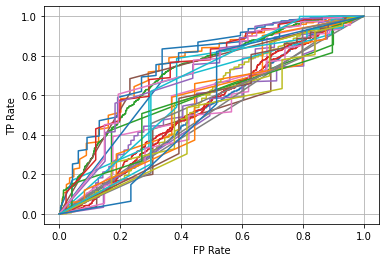

In [10]:
auc_value = []

for i, x_train in enumerate(np.array(X_train).T):
    x_train  = x_train.reshape(-1, 1)
    log_reg = LogisticRegression(random_state=0, penalty='l1', solver='liblinear').fit(x_train, y_train)
    y_pred = log_reg.predict_proba(x_train)[:, 1]
    ## calculating the auc_values for each log regression rained on a single feature i
    fpr, tpr, thresholds = metrics.roc_curve(np.array(y_train, dtype=int),  y_pred)
    auc = metrics.roc_auc_score(y_train, y_pred)
    auc_value.append(auc)
    # predict = log_reg.predict(x_train)
    # print(predict[predict != 0])
    print(f'#{i}: {auc}), score={log_reg.score(x_train, np.array(y_train))}')
    ## ploting ROC curves
    plt.plot(fpr,tpr)
    plt.ylabel('TP Rate')
    plt.xlabel('FP Rate')

## printing all the auc values to see the best features
auc_value = np.array(auc_value)
print(auc_value)
## studying how many good feature we have
print(np.argwhere(auc_value > 0.65))  # 0.50, 0.55, 0.60, 0.65
plt.grid(True)
plt.show()
## some of the best features
# good: 1, (9), 10, 12, 15, (19), 20, 23, 24, 26, (29)

Learning how to use sklearn.feature_selection.

I am using 3 different metrics and they give almost the same results with some minor variations

In [11]:
## K here stands for the number of the best features
for K in [10, 12, 14, 16, 18, 20, 22, 24]:
    ## using 3 different metrics here and printing the best results
    X_best = SelectKBest(chi2, k=K).fit(X_train, y_train)
    good_chi = X_best.get_support(True)
    print(good_chi)
    X_best = SelectKBest(f_classif, k=K).fit(X_train, y_train)
    good_f = X_best.get_support(True)
    print(good_f)
    X_best = SelectKBest(mutual_info_classif, k=K).fit(X_train, y_train)
    good_mutual = X_best.get_support(True)
    print(good_mutual)

[ 1 10 12 15 19 20 23 24 26 29]
[ 1 10 12 15 19 20 23 24 26 29]
[ 1  4  8 14 16 20 21 23 24 26]
[ 1  6 10 12 15 19 20 23 24 25 26 29]
[ 1  6  9 10 12 15 19 20 23 24 26 29]
[ 1  4  5  8 14 16 20 21 23 24 25 26]
[ 1  6  9 10 12 15 17 19 20 23 24 25 26 29]
[ 1  4  6  9 10 12 15 19 20 23 24 25 26 29]
[ 1  4  5  8 10 14 16 20 21 23 24 25 26 28]
[ 1  4  6  9 10 11 12 15 17 19 20 23 24 25 26 29]
[ 1  2  4  6  9 10 11 12 15 19 20 23 24 25 26 29]
[ 1  4  5  6  8 10 11 14 16 20 21 23 24 25 26 28]
[ 1  2  4  6  8  9 10 11 12 15 17 19 20 23 24 25 26 29]
[ 1  2  4  6  8  9 10 11 12 15 19 20 22 23 24 25 26 29]
[ 1  4  5  6  8  9 10 11 14 16 18 20 21 23 24 25 26 28]
[ 1  2  4  6  8  9 10 11 12 15 17 18 19 20 23 24 25 26 27 29]
[ 1  2  4  6  8  9 10 11 12 15 17 18 19 20 22 23 24 25 26 29]
[ 1  4  5  6  8  9 10 11 14 16 18 20 21 22 23 24 25 26 28 29]
[ 1  2  4  6  8  9 10 11 12 13 15 17 18 19 20 22 23 24 25 26 27 29]
[ 1  2  4  6  8  9 10 11 12 13 15 17 18 19 20 22 23 24 25 26 27 29]
[ 1  4  5  6  8  9

Studying the correlation between features. Checking if there are features with very high correlation.
It seems like there are no features that we can discard. They all have at least some extra information.

In [12]:
## here we need to transpose the matrix so we can see the correlationg between features and not the points
corr = np.corrcoef(X_train_full.T)
for i, cor in enumerate(corr):
    ## just the correlation between each of the feature with all others
    print(f'feature #{i}: {cor}')

feature #0: [ 1.          0.01084989  0.06969375  0.03402593 -0.04909657 -0.00769498
 -0.06339786  0.00566963 -0.01620359 -0.12000761 -0.00701266  0.03092725
 -0.0192286  -0.01422055  0.08876807 -0.02099639 -0.01124058  0.03276864
 -0.01469112 -0.00515771  0.00841317 -0.0231872  -0.06619107 -0.00533783
 -0.00623978  0.06499876  0.00784805 -0.05366953 -0.0341357  -0.00246933
 -0.00407835]
feature #1: [ 1.08498867e-02  1.00000000e+00 -6.29730963e-02  1.12392586e-01
  2.34056213e-02  2.15614130e-01  3.78361789e-02 -2.49197900e-02
  5.99766217e-02  9.60351525e-02  5.60158376e-01  3.24288575e-02
  5.51208650e-01 -1.56067593e-02  3.16628143e-01 -4.93608345e-02
  1.07078255e-02  1.30347594e-02  1.09386347e-01  1.46226603e-01
  7.19670990e-01 -2.59756291e-02  7.57522727e-04  4.10033355e-01
  3.37097776e-01  2.63541181e-01  3.33935826e-01  6.72852250e-02
 -7.65173596e-02  3.07576604e-01 -3.73051112e-03]
feature #2: [ 6.96937531e-02 -6.29730963e-02  1.00000000e+00 -2.12689849e-02
 -6.56127047e-0

Different combinations of good features I have been using. Some of them I got later into the file and copied here.

In [13]:
# features_best = np.arange(31)
# features_best = np.arange(30)
# features_best = [1, 2, 4, 6, 9, 10, 11, 14, 15, 19, 20, 21, 22, 23, 24, 25]
# features_best = [1, 9, 10, 12, 15, 19, 20, 23, 24, 26, 29]
# features_best = [1, 10, 12, 15, 19, 20, 23, 24, 26]
# features_best = [1, 3,  6,  8, 10, 12, 13, 15, 19, 20, 23, 24, 25, 26, 29, 30]
features_best = [1, 2, 3, 4, 5, 6,  8,  9, 10, 11, 12, 13, 15, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

Training logistic regression with different parameters. I am using GridSearchCV here with different
numbers of folders for cross-validation: cv = 5, 6, 7, 8, 9, 10.

In [14]:
## Using f1 score for GridSearchCV because f1 is used on the kaggle. But I also look at the score from sklearn
f1 = make_scorer(f1_score , average='binary')

## Different solvers and sets of the parameters were used. Here you can see some of them
## 'liblinear' solver is used in the end because it's the fastest one
## more over I have seen a noticeable difference using various solvers
parameters_log_reg = {
    'penalty':['l2'],
    # 'penalty':['l2', 'l1'],
    'C':[1e1, 0.8, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    # 'C':[1e0, 1e1, 5e1, 1e2, 8e2, 9e2, 1e3, 2e3, 3e3, 4e3, 4e3],
    # 'class_weight':[{1:1, 0:1}, {1:1.5, 0:1}, {1:2, 0:1},{1:2.5, 0:1},
    #                 {1:3, 0:1}, {1:3.5, 0:1}, {1:4, 0:1}, 'balanced'],
    'class_weight':[{1:1, 0:1}],
    'intercept_scaling':[1, 1.5, 2],
    'solver':['liblinear'],
}
log_reg = LogisticRegression(random_state=1, max_iter=400)
## n_jobs was set to 1 in the beginning because only without parallelism verbose=3 correctly
## shows the information about each model
clf = GridSearchCV(log_reg, parameters_log_reg, n_jobs=16, scoring=f1, cv=7)
clf.fit(X_train[:, features_best], y_train)
# print(clf.cv_results_)
bestCase = clf.cv_results_['mean_test_score'].argmax()
## printing the best parameters
print(clf.cv_results_['param_penalty'][bestCase],
      clf.cv_results_['param_C'][bestCase],
      clf.cv_results_['param_class_weight'][bestCase],
      clf.cv_results_['param_intercept_scaling'][bestCase],
      clf.cv_results_['param_solver'][bestCase],
)
## retraining the model with the best parameters
## sometimes I was changing them to something different here
best_model = LogisticRegression(
    random_state=1,
    penalty=clf.cv_results_['param_penalty'][bestCase],
    C=clf.cv_results_['param_C'][bestCase],
    class_weight=clf.cv_results_['param_class_weight'][bestCase],
    intercept_scaling=clf.cv_results_['param_intercept_scaling'][bestCase],
    solver=clf.cv_results_['param_solver'][bestCase],

)
best_model.fit(X_train[:, features_best], y_train)
prediction_train = best_model.predict(X_train[:, features_best])
## looking at how many correctly predicted ones and zeros are
print(len(prediction_train[prediction_train==0]),len(prediction_train[prediction_train==1]))
print( len(y_train[y_train==0]), len(y_train[y_train==1]),)
## printing the score and F1 value fro training data and validation data
## to see the performance and make the conclusion how strongly we overfit
prediction = best_model.predict(X_val[:, features_best])
f1_best_train = f1_score(y_train, prediction_train)
f1_best = f1_score(y_val, prediction)
print(f'RF: Train score: {best_model.score(X_train[:, features_best], y_train)}, Train F1 {f1_best_train}')
print(f'RF: Val score: {best_model.score(X_val[:, features_best], y_val)}, Val F1 {f1_best}')

l2 1 {1: 1, 0: 1} 2 liblinear
906 956
944 918
RF: Train score: 0.8947368421052632, Train F1 0.8954108858057631
RF: Val score: 0.8656716417910447, Val F1 0.6086956521739131


Here I was learning a new method to study the feature performance: SelectFromModel.
I was using some of the sets it gave me in the retraining. I have not found it very useful
because al the features almost always outperformed any smaller sets.

In [15]:
test_model = LogisticRegression(
    random_state=1,
    penalty=clf.cv_results_['param_penalty'][bestCase],
    C=clf.cv_results_['param_C'][bestCase],
    class_weight=clf.cv_results_['param_class_weight'][bestCase],
    intercept_scaling=clf.cv_results_['param_intercept_scaling'][bestCase],
    solver=clf.cv_results_['param_solver'][bestCase],
)
## threshold to see the different sets of the best features for my model
for threshold in [None, 'median', -0.5, 0, 1e-1, 2e-1, 3e-1, 4e-1, 0.5, 1, 1.5, 2, 2.5]:
    print(f'threshold: {threshold}')
    ## choosing the best parameters from  our best model
    model = SelectFromModel(estimator=test_model, threshold=threshold).fit(X_train, y_train)
    # print(model.estimator_.coef_)
    _best = np.array(model.get_support())
    features_best_sel = np.stack(np.argwhere(_best == True), axis=1)[0]
    print(features_best_sel)
    ## re-training the model to see how it performs with the new set of features
    test_model.fit(X_train[:, features_best_sel], y_train)
    prediction = test_model.predict(X_val[:, features_best_sel])
    f1_best = f1_score(y_val, prediction)
    print(f'Val score: {test_model.score(X_val[:, features_best_sel], y_val)}, Val F1 {f1_best}')


threshold: None
[ 1  4  6  9 10 14 15 19 20 22 24 25]
Val score: 0.8880597014925373, Val F1 0.6511627906976745
threshold: median
[ 1  2  4  6  9 10 11 12 14 15 19 20 22 24 25 26]
Val score: 0.8731343283582089, Val F1 0.6304347826086957
threshold: -0.5
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
Val score: 0.8768656716417911, Val F1 0.6292134831460675
threshold: 0
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
Val score: 0.8768656716417911, Val F1 0.6292134831460675
threshold: 0.1
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Val score: 0.8731343283582089, Val F1 0.6222222222222222
threshold: 0.2
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
Val score: 0.8805970149253731, Val F1 0.6444444444444444
threshold: 0.3
[ 0  1  2  3  4  5  6  9 10 11 12 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 29]
Val sc

Measuring the speed performance. On average the training speed is ~ 9ms.

In [16]:
# THE_best_params = [1, 2, 3, 4, 6, 9, 10, 11, 12, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 29, 30]  # 31 23
# THE_best_params = [1, 2, 4, 6, 9, 10, 11, 14, 15, 19, 20, 21, 22, 23, 24, 25]  # 31 16
THE_best_params = features_best
times_train = 5  # number of retrainings
time_log_reg = timeit.timeit('best_model.fit(X_train_full[:, THE_best_params], y_train_full)',
                           number=times_train, globals=globals())
print(time_log_reg / times_train)


0.007282760000089183


In [17]:
def result_file(prediction, name):
    """
    Function saves the final prediction in the correct format for kaggle.com
    :param prediction: array with the predictions
    :param name: the name of the file
    :return: None
    """
    example = pd.read_csv('sample_submission.csv')
    example['Predicted'] = prediction
    print(name)
    example.to_csv(name + '.csv', index=False)

Prediction for the test data with the final model, trained on training data and on the whole data.
Using 2 different piece of data data to see the difference between them.
Parameters are optimized for the training data
but the whole data is larger so both can work better.

In [18]:
## selecting the features to use for the final model
THE_best_params = features_best
## here we can switch between the data we are using
best_model.fit(X_train_full[:, THE_best_params], y_train_full)
# best_model.fit(X_train[:, THE_best_params], y_train)
prediction = best_model.predict(X_test[:, THE_best_params])
prediction_val = best_model.predict(X_val[:, THE_best_params])
f1_best = f1_score(y_val, prediction_val)
print(f'Val score: {best_model.score(X_val[:, THE_best_params], y_val)}, Val F1 {f1_best}')
prediction_train = best_model.predict(X_train[:, THE_best_params])
f1_best = f1_score(y_train, prediction_train)
print(f'Train score: {best_model.score(X_train[:, THE_best_params], y_train)}, Train F1 {f1_best}')
prediction_train_full = best_model.predict(X_train_full[:, THE_best_params])
f1_best = f1_score(y_train_full, prediction_train_full)
print(f'Train full score: {best_model.score(X_train_full[:, THE_best_params], y_train_full)}, Train full F1 {f1_best}')
result_file(prediction, f'prediction_logReg_Final_day_{len(features_best)}_{len(THE_best_params)}_cv=8_full_resample')

Val score: 0.8805970149253731, Val F1 0.6444444444444444
Train score: 0.8839957035445757, Train F1 0.8853503184713376
Train full score: 0.8909618573797679, Train full F1 0.8957590170432026
prediction_logReg_Final_day_25_25_cv=8_full_resample


Here I am using the random forest algorithm.

In [19]:
f1 = make_scorer(f1_score, average='binary')

# some of the parameters I was looking at are in the comments
parameters_RF = {
    # 'n_estimators':[50, 75, 100, 150, 175],
    'n_estimators':[200],
    # 'criterion':['gini', 'entropy', 'log_loss'],
    'criterion':['entropy'],
    # 'max_depth':[None, 2, 3, 4, 5,  6, 7],
    'max_depth':[None],
    # 'min_samples_split':[2, 0.1, 0.15, 0.2, 0.3, 0.4],
    # 'min_samples_split':[2, 0.001, 0.025, 0.05, 0.075, 0.1],
    'min_samples_split':[2],
    # 'min_samples_leaf':[1, 3, 7, 11],
    'min_samples_leaf':[1],
    # 'class_weight':['balanced', 'balanced_subsample', {1:1, 0:1}, {1:1.5, 0:1}, {1:2, 0:1}, {1:2.5, 0:1}],
    'class_weight':[None],
    # 'max_leaf_nodes':[None, 8, 16],
    'max_leaf_nodes':[None],
    # 'max_features': ['sqrt', None, 'log2'],
    'max_features': ['sqrt'],
}

# parameters_RF = {
#     # 'n_estimators':[50, 75, 125, 100, 125, 150, 175, 250],
#     'n_estimators':[75],
#     # 'criterion':['gini', 'entropy', 'log_loss'],
#     'criterion':['log_loss'],
#     # 'max_depth':[None, 2, 3, 4, 5,  6, 7, 8, 9],
#     'max_depth':[5],
#     # 'min_samples_split':[2, 0.1, 0.15, 0.2, 0.3, 0.4],
#     # 'min_samples_split':[2, 0.001, 0.025, 0.05, 0.075, 0.1],
#     'min_samples_split':[2],
#     'min_samples_leaf':[1],
#     # 'min_samples_leaf':[1, 5, 7],
#     # 'class_weight':['balanced', 'balanced_subsample', {1:1, 0:1}, {1:1.5, 0:1}, {1:2, 0:1}, {1:2.5, 0:1}],
#     'class_weight':[{1:1, 0:1}],
#     # 'max_leaf_nodes':[None, 2,3 ,4],
#     'max_leaf_nodes':[None],
#     # 'max_features': ['sqrt', None, 'log2',4, 5, 6, 7, 8, 9, 10],
#     'max_features': [9],
#
# }

## selecting the random forest classifier
RF_class = RandomForestClassifier(random_state=1)
clf = GridSearchCV(RF_class, parameters_RF, n_jobs=16, scoring=f1, cv=7, verbose=3)
clf.fit(X_train[:, features_best], y_train)
# print(clf.cv_results_)
bestCase = clf.cv_results_['mean_test_score'].argmax()
## printing the best parameters
print(clf.cv_results_['param_n_estimators'][bestCase],
    clf.cv_results_['param_criterion'][bestCase],
    clf.cv_results_['param_max_depth'][bestCase],
    clf.cv_results_['param_min_samples_split'][bestCase],
    clf.cv_results_['param_min_samples_leaf'][bestCase],
    clf.cv_results_['param_class_weight'][bestCase],
    clf.cv_results_['param_max_leaf_nodes'][bestCase],
    clf.cv_results_['param_max_features'][bestCase],
)
## using the best parameters to train the model
best_model = RandomForestClassifier(
    random_state=1,
    n_estimators=clf.cv_results_['param_n_estimators'][bestCase],
    criterion=clf.cv_results_['param_criterion'][bestCase],
    max_depth=clf.cv_results_['param_max_depth'][bestCase],
    min_samples_split=clf.cv_results_['param_min_samples_split'][bestCase],
    min_samples_leaf=clf.cv_results_['param_min_samples_leaf'][bestCase],
    class_weight=clf.cv_results_['param_class_weight'][bestCase],
    max_leaf_nodes=clf.cv_results_['param_max_leaf_nodes'][bestCase],
    max_features=clf.cv_results_['param_max_features'][bestCase],
)

best_model.fit(X_train[:, features_best], y_train)
prediction_train = best_model.predict(X_train[:, features_best])
print(len(prediction_train[prediction_train==0]),len(prediction_train[prediction_train==1]))
print( len(y_train[y_train==0]), len(y_train[y_train==1]),)
## printing the score and F1 value fro training data and validation data
## to see the performance and make the conclusion how strongly we overfit
prediction = best_model.predict(X_val[:, features_best])
f1_best_train = f1_score(y_train, prediction_train)
f1_best = f1_score(y_val, prediction)
print(f'RF: Train score: {best_model.score(X_train[:, features_best], y_train)}, Train F1 {f1_best_train}')
print(f'RF: Val score: {best_model.score(X_val[:, features_best], y_val)}, Val F1 {f1_best}')

Fitting 7 folds for each of 1 candidates, totalling 7 fits
200 entropy None 2 1 None None sqrt
943 919
944 918
RF: Train score: 0.9983888292158969, Train F1 0.9983669025585192
RF: Val score: 0.9440298507462687, Val F1 0.7058823529411764


Measuring the speed of the model. The average value is ~1s

In [20]:
times_train = 5
time_forest = timeit.timeit('best_model.fit(X_train_full[:, THE_best_params], y_train_full)',
                           number=times_train, globals=globals())
print(time_forest / times_train)
print(best_model)

0.7987325599999167
RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=1)


Here I am working on the 3nd algorithm - adaboost. As an estimator I tried decision trees and support vector
machines. 2nd one was too hard to optimize so in the end I was mostly using decision trees.

In [21]:
## some of the feature sets
# features_best = np.arange(31)
# features_best = [1, 2, 4, 6, 9, 10, 11, 14, 15, 19, 20, 21, 22, 23, 24, 25]
# features_best = [1, 10, 12, 15, 19, 20, 23, 24, 26]
# features_best = [1, 3,  6,  8, 10, 12, 13, 15, 19, 20, 23, 24, 25, 26, 29, 30]
features_best = [1, 2, 3, 4, 5, 6,  8,  9, 10, 11, 12, 13, 15, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

In [22]:
f1 = make_scorer(f1_score , average='binary')

# different estimators
tree1 = DecisionTreeClassifier()
tree2 = DecisionTreeClassifier(max_depth=2)
tree3 = DecisionTreeClassifier(max_depth=3)
tree4 = DecisionTreeClassifier(max_depth=4, max_features=5, max_leaf_nodes=2, )
tree5 = DecisionTreeClassifier(max_depth=5, max_features=7)
tree6 = DecisionTreeClassifier(max_depth=6)
svc1 = SVC(probability=True, kernel='linear', gamma='scale')
svc1_2 = SVC(probability=True, kernel='linear', gamma='auto')
svc2 = SVC(probability=True, kernel='poly', gamma='scale')
svc2_2 = SVC(probability=True, kernel='poly', gamma='auto')
svc3 = SVC(probability=True, kernel='rbf', gamma='scale')
svc3_2 = SVC(probability=True, kernel='rbf', gamma='auto')
## some combinations of the parameters to use in GridSearchCV
parameters_AB = {
    'learning_rate':[1],
    'base_estimator':[tree4],
    # 'base_estimator':[tree1, tree2, tree3, tree4,  tree5, tree6],
                      # svc1, svc2, svc3, svc1_2, svc2_2, svc3_2],
    # 'n_estimators':[50, 70, 90,],
    'n_estimators':[100],
}
## adaboost classifier
AB_class = AdaBoostClassifier(random_state=1)
clf = GridSearchCV(AB_class, parameters_AB, scoring=f1, n_jobs=16, cv=5)
clf.fit(X_train[:, features_best], y_train)
# print(clf.cv_results_)
bestCase = clf.cv_results_['mean_test_score'].argmax()
print(clf.cv_results_['param_learning_rate'][bestCase],
    clf.cv_results_['param_n_estimators'][bestCase],
    clf.cv_results_['param_base_estimator'][bestCase],
)
best_model = AdaBoostClassifier(
    random_state=1,
    learning_rate=clf.cv_results_['param_learning_rate'][bestCase],
    base_estimator=clf.cv_results_['param_base_estimator'][bestCase],
    n_estimators=clf.cv_results_['param_n_estimators'][bestCase],
)

#4, 5, 2, 1, 0.97, 104
## looking at the scores on the training and validation data and the number of 0 and 1 features
best_model.fit(X_train[:, features_best], y_train)
prediction_train = best_model.predict(X_train[:, features_best])
print(len(prediction_train[prediction_train==0]),len(prediction_train[prediction_train==1]))
print( len(y_train[y_train==0]), len(y_train[y_train==1]),)
prediction = best_model.predict(X_val[:, features_best])
f1_best_train = f1_score(y_train, prediction_train)
f1_best = f1_score(y_val, prediction)
print(f'RF: Train score: {best_model.score(X_train[:, features_best], y_train)}, Train F1 {f1_best_train}')
print(f'RF: Val score: {best_model.score(X_val[:, features_best], y_val)}, Val F1 {f1_best}')

1 100 DecisionTreeClassifier(max_depth=4, max_features=5, max_leaf_nodes=2)
944 918
944 918
RF: Train score: 0.9763694951664876, Train F1 0.9760348583877996
RF: Val score: 0.9365671641791045, Val F1 0.7301587301587302


Measuring the speed of the model. The average value is ~0.4s. Not the slowest one and and I achieved the best
results with it.

In [23]:
times_train = 5
time_ada = timeit.timeit('best_model.fit(X_train_full[:, THE_best_params], y_train_full)',
                           number=times_train, globals=globals())
print(time_ada / times_train)


0.20230321999988518


Calculating plots with some hyperparameter tunings. I am doing it with my final model (Adaboost one) and showing
the curves for tuning the learning rate and the number of estimators.

In [24]:
THE_best_params = np.arange(31)

F1_scores_lr = []
F1_scores_train_lr = []
## for the learning rate curve
for learning_rate in np.linspace(0.80, 0.99, 31):
    for n_estimators in [97]:
        tree4 = DecisionTreeClassifier(max_depth=4, max_features=5, max_leaf_nodes=2,
                                       )
        best_model = AdaBoostClassifier(
            random_state=1,
            learning_rate=learning_rate,
            base_estimator=tree4,
            n_estimators=n_estimators,
        )
        ## raining the model on the training data
        best_model.fit(X_train[:, THE_best_params], y_train)
        ## calculating the score for the validation data
        prediction_val = best_model.predict(X_val[:, THE_best_params])
        f1_best = f1_score(y_val, prediction_val)
        F1_scores_lr.append(f1_best)
        ## caluclating the score for the training data
        prediction_train = best_model.predict(X_train[:, THE_best_params])
        f1_best = f1_score(y_train, prediction_train)
        F1_scores_train_lr.append(f1_best)

F1_scores_ne = []
F1_scores_train_ne = []
## for n_estimators curve
for learning_rate in [0.97]:
    for n_estimators in range(69, 115):
        tree4 = DecisionTreeClassifier(max_depth=4, max_features=5, max_leaf_nodes=2,
                                       )
        best_model = AdaBoostClassifier(
            random_state=1,
            learning_rate=learning_rate,
            base_estimator=tree4,
            n_estimators=n_estimators,
        )
        ## raining the model on the training data
        best_model.fit(X_train[:, THE_best_params], y_train)
        ## calculating the score for the validation data
        prediction_val = best_model.predict(X_val[:, THE_best_params])
        f1_best = f1_score(y_val, prediction_val)
        F1_scores_ne.append(f1_best)
        ## caluclating the score for the training data
        prediction_train = best_model.predict(X_train[:, THE_best_params])
        f1_best = f1_score(y_train, prediction_train)
        F1_scores_train_ne.append(f1_best)


print('done')

done


Plotting the tuning of the learning rate for the adaboost.

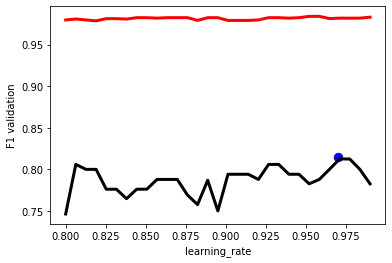

In [25]:
plt.scatter(0.97, 0.815, c='b', s=70)
plt.plot(np.linspace(0.80, 0.99, 31),F1_scores_lr, lw=3, c='k', label='validation')
plt.plot(np.linspace(0.80, 0.99, 31),F1_scores_train_lr, lw=3, c='r', label='training')
plt.xlabel(f'learning_rate')
plt.ylabel(f'F1 validation')
plt.savefig('learning_rate.png')
plt.show()

Plotting the tuning of the number of features for the adaboost.

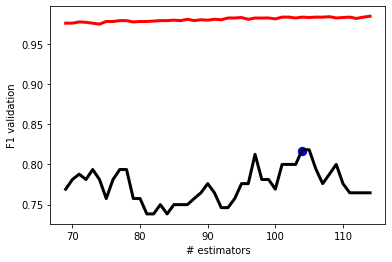

In [26]:
plt.scatter(104, 0.817, c='b', s=70)
plt.plot(range(69, 115),F1_scores_ne, lw=3, c='k', label='validation')
plt.plot(range(69, 115),F1_scores_train_ne, lw=3, c='r', label='training')
plt.xlabel(f'# estimators')
plt.ylabel(f'F1 validation')
plt.savefig('estimators.png')
plt.show()

ROC curves and AUC values for the final Adaboost model.

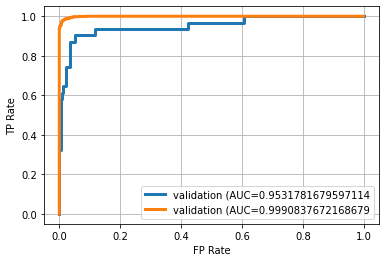

In [31]:
THE_best_params = np.arange(31)
tree4 = DecisionTreeClassifier(max_depth=4, max_features=5, max_leaf_nodes=2)
best_model = AdaBoostClassifier(
    random_state=1,
    learning_rate=0.97,
    base_estimator=tree4,
    n_estimators=104,
)
best_model.fit(X_train[:, THE_best_params], y_train)
y_pred = best_model.predict_proba(X_val[:, THE_best_params])[:, 1]
## calculating the auc_values for validation data
fpr, tpr, thresholds = metrics.roc_curve(np.array(y_val, dtype=int),  y_pred)
auc = metrics.roc_auc_score(y_val, y_pred)
## plotting ROC curve
plt.plot(fpr,tpr, lw=3, label=f'validation (AUC={auc}')
y_pred = best_model.predict_proba(X_train[:, THE_best_params])[:, 1]
## calculating the auc_values for training data
fpr, tpr, _ = metrics.roc_curve(np.array(y_train, dtype=int),  y_pred)
auc = metrics.roc_auc_score(y_train, y_pred)
## plotting ROC curve
plt.plot(fpr,tpr, lw=3, label=f'validation (AUC={auc}')

plt.ylabel('TP Rate')
plt.xlabel('FP Rate')
plt.grid(True)
plt.legend()
plt.savefig('ROC.png')
plt.show()

THE FINAL MODEL

In [28]:
tree4 = DecisionTreeClassifier(max_depth=4, max_features=5, max_leaf_nodes=2)
best_model = AdaBoostClassifier(
    random_state=1,
    learning_rate=0.97,
    base_estimator=tree4,
    n_estimators=104,
)
## selecting the features to use for the final model
THE_best_params = np.arange(31)
## Training on the training data
best_model.fit(X_train[:, THE_best_params], y_train)
prediction = best_model.predict(X_test[:, THE_best_params])
## saving the final predictions for the kaggle
result_file(prediction, f'The_FINAL_ada')



The_FINAL_ada
